# Sample Notebook for causalmodel

In [1]:
# create a notebook to showcase the causalmodel
import sys
sys.path.insert(0,'..')

from causalmodel.observational import Observational
from causalmodel.utils.random_data import get_data, get_clustered_data, get_data_continuous
import numpy as np

In [2]:
from causalmodel.LearningModels import LogisticRegression
from causalmodel.LearningModels import OLS

LogisticRegression = LogisticRegression()
OLS = OLS()
Y, Z, X = get_data()
po = Observational(Y, Z, X)
po.est_via_ipw(LogisticRegression).show()
po.est_via_aipw(OLS, LogisticRegression).show()
po.est_via_matching(10,20).show()
po.est_via_matching(10,20,bias_adj=True).show()
Y, Z, X = get_data_continuous()
po = Observational(Y, Z, X)
po.est_via_dml().show()

********************
average treatment effect: 10.026090121006195

standard error:           0.14275779292630086

p value:                  0.0

confidence interval:      (9.746284846870646, 10.305895395141745)
********************
average treatment effect: 10.025103579338923

standard error:           0.025526880276224437

p value:                  0.0

confidence interval:      (9.975070893997524, 10.075136264680323)
********************
average treatment effect: 10.069903344801236

standard error:           0.025486795038849916

p value:                  0.0

confidence interval:      (10.01994922652509, 10.119857463077382)
********************
average treatment effect: 10.014439227229367

standard error:           0.02549282934839025

p value:                  0.0

confidence interval:      (9.964473281706523, 10.064405172752211)
********************
average treatment effect: 9.99265034088587

standard error:           0.009901116165830613

p value:                  0.0

confidence

In [6]:
def simulation(n=2000):
    Z_e, Z_thm, SE, SE_BOUND = list(), list(), list(), list()
    for i in range(n):
        Y, Z, X, prob = get_data()
        po = PotentialOutcome(Y, Z, X)
        result = po.est_via_ipw(LogisticRegression)
        t = result.average_treatment_effect
        se = result.standard_error
        se_bound = np.sqrt(np.mean(1/prob + 1/(1-prob))/len(Z))
        Z_e.append((t-tau)/se)
        Z_thm.append((t-tau)/se_bound)
        SE.append(se)
        SE_BOUND.append(se_bound)
    return Z_e, Z_thm, SE, SE_BOUND

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm

Z_e, Z_thm, SE, SE_BOUND = simulation()

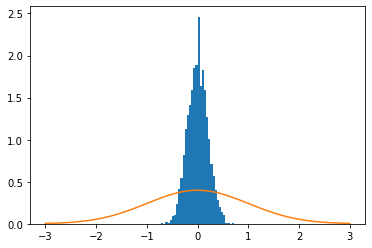

0.10230492885977441


In [8]:
_ = plt.hist(Z_e, density=True, bins='auto',range=(-3,3))
x = np.linspace(-3,3)
pdf = norm.pdf(x)
_ = plt.plot(x,pdf)
plt.show()
print(np.mean(SE))

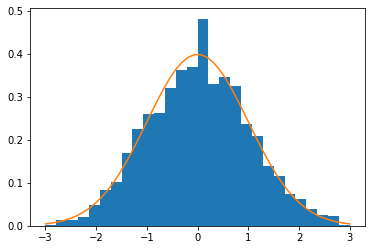

0.020050220175713448


In [9]:
_ = plt.hist(Z_thm, density=True, bins='auto',range=(-3,3))
x = np.linspace(-3,3)
pdf = norm.pdf(x)
_ = plt.plot(x,pdf)
plt.show()
print(np.mean(SE_BOUND))

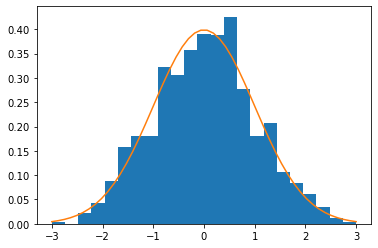

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulation2(n=1000):
    Z, SE, TAU = list(), list(), list()
    for i in range(n):
        Y, T, X, prob = get_data(N=1000)
        po = PotentialOutcome(Y, T, X)
        result = po.est_via_aipw(OLS,LogisticRegression)
        z = result.z
        se = result.standard_error
        Z.append(z)
        SE.append(se)
        TAU.append(result.average_treatment_effect)
    return Z, SE, TAU

Z2, SE2, TAU2 = simulation2()
_ = plt.hist((np.array(TAU2) - tau)/np.sqrt(np.var(TAU2)), density=True, bins='auto', range=(-3,3))
x = np.linspace(-3,3)
pdf = norm.pdf(x)
_ = plt.plot(x,pdf)
plt.show()

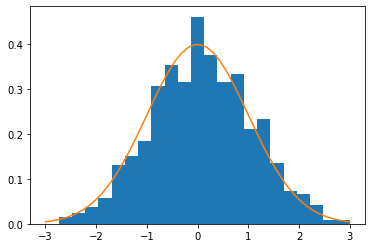

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulation3(n=1000):
    Z, SE, TAU = list(), list(), list()
    for i in range(n):
        Y, T, X, prob = get_data(N=1000)
        po = PotentialOutcome(Y, T, X)
        result = po.est_via_matching(1,1,bias_adj=True)
        z = result.z
        se = result.standard_error
        Z.append(z)
        SE.append(se)
        TAU.append(result.average_treatment_effect)
    return Z, SE, TAU

Z3, SE3, TAU3 = simulation3()
_ = plt.hist((np.array(TAU3) - tau)/np.sqrt(np.var(TAU3)), density=True, bins='auto', range=(-3,3))
x = np.linspace(-3,3)
pdf = norm.pdf(x)
_ = plt.plot(x,pdf)
plt.show()

In [5]:
from causalinference import CausalModel
from causalinference.utils import random_data
import time

#Y, D, X = random_data()
Y, D, X = get_data(k=5)
causal = CausalModel(Y, D, X)
t1 = time.time()
causal.est_via_matching(matches=1,bias_adj=True)
t2 = time.time()
print(t2-t1, causal.estimates)
po = Observational(Y, D, X)
t1 = time.time()
ret = po.est_via_matching(1,1,bias_adj=True)
t2 = time.time()
print(t2-t1)
ret.show()

/Users/liujizhou/anaconda3/lib/python3.6/site-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


5.293885946273804 
Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     10.032      0.039    258.724      0.000      9.956     10.108
           ATC     10.014      0.047    214.897      0.000      9.923     10.106
           ATT     10.049      0.048    211.465      0.000      9.955     10.142

6.920804023742676
********************
average treatment effect: 10.038885680838472

standard error:           0.029110590467003154

p value:                  0.0

confidence interval:      (9.981828923523146, 10.095942438153799)


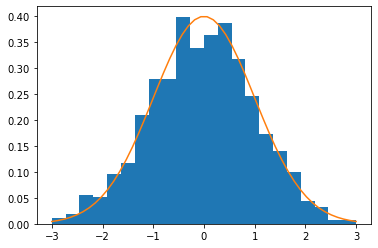

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm

tau = 10

def simulation4(n=1000):
    Z, SE, TAU = list(), list(), list()
    for i in range(n):
        Y, T, X = get_data_continuous(N=1000)
        po = Observational(Y, T, X)
        result = po.est_via_dml(Kfolds=2)
        z = result.z
        se = result.standard_error
        Z.append(z)
        SE.append(se)
        TAU.append(result.average_treatment_effect)
    return Z, SE, TAU

Z4, SE4, TAU4 = simulation4()
_ = plt.hist((np.array(TAU4) - tau)/np.array(SE4), density=True, bins='auto', range=(-3,3))
x = np.linspace(-3,3)
pdf = norm.pdf(x)
_ = plt.plot(x,pdf)
plt.show()

0.04871737555363345 0.14048525978119938 10.059790746609542


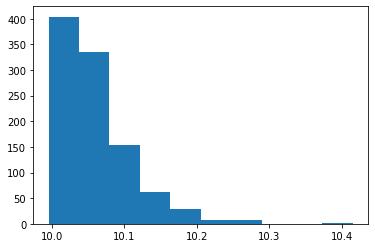

In [4]:
print(np.std(TAU4),np.mean(SE4), np.mean(TAU4))
plt.hist(TAU4)
plt.show()

In [10]:
Y, Z, X = get_data_continuous()
po = Observational(Y, Z, X)
po.est_via_dml().show()

********************
average treatment effect: 9.999880891479801

standard error:           0.037224793694327685

p value:                  0.0

confidence interval:      (9.926920295838919, 10.072841487120684)
